In [44]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler




In [45]:
# Load dataset
df = pd.read_csv('/content/tvmarketing.csv')
df.head()


,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [46]:
print("\n Dataset Info:")
df.info()


 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [47]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [48]:
# Check for nulls and duplicates
print(" Null values:\n", df.isnull().sum())
print("\n Duplicate rows:", df.duplicated().sum())


 Null values:
 TV       0
Sales    0
dtype: int64

 Duplicate rows: 0


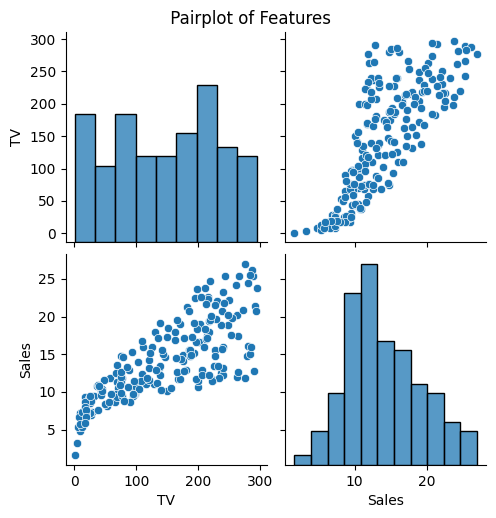

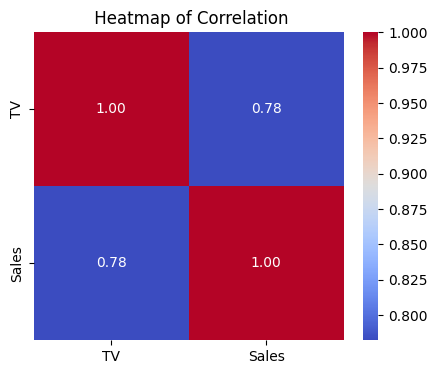

In [49]:
# Pairplot
sns.pairplot(df)
plt.suptitle(" Pairplot of Features", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(5,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title(" Heatmap of Correlation")
plt.show()


In [50]:
# Define features and target
X = df[['TV']]       # TV is the feature
y = df['Sales']      # Sales is the target

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
# Train linear regression
model = LinearRegression()
model.fit(X_train, y_train)
print("Coefficient (Weight):", model.coef_)
print("Intercept (Bias):", model.intercept_)


Coefficient (Weight): [0.04652973]
Intercept (Bias): 7.119638430592953


In [52]:
# Predict on test set
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" Evaluation Metrics:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


 Evaluation Metrics:
MAE: 2.444420003751042
MSE: 10.204654118800956
RMSE: 3.194472431998898
R² Score: 0.6766954295627076


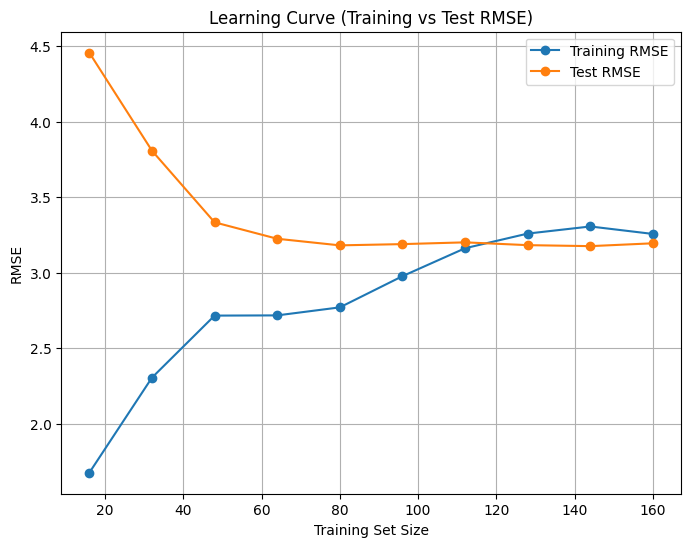

In [53]:

train_sizes = np.linspace(0.1, 1.0, 10)

train_rmse = []
test_rmse = []

for size in train_sizes:
    n_train = int(size * len(X_train))
    X_sub = X_train[:n_train]
    y_sub = y_train[:n_train]

    model = LinearRegression()
    model.fit(X_sub, y_sub)

    y_train_pred = model.predict(X_sub)
    y_test_pred = model.predict(X_test)

    train_error = np.sqrt(mean_squared_error(y_sub, y_train_pred))
    test_error = np.sqrt(mean_squared_error(y_test, y_test_pred))

    train_rmse.append(train_error)
    test_rmse.append(test_error)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(train_sizes * len(X_train), train_rmse, 'o-', label='Training RMSE')
plt.plot(train_sizes * len(X_train), test_rmse, 'o-', label='Test RMSE')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.title('Learning Curve (Training vs Test RMSE)')
plt.legend()
plt.grid(True)
plt.show()
